<center> <span style="color:indigo">Métodos Estadísticos Básicos</span> </center> 

<div style="text-align: center;">
<img src="../Imagenes/MCD.jpg" alt="Drawing" style="width: 800px;"/>
</div>

<center> <span style="color:DarkBlue">  Unidad 1. Estadística Descriptiva </span>  </center>
<center> <span style="color:Blue"> M. en C. Iván A. Toledano Juárez </span>  </center>

In [9]:
## Librerias utilizadas

import pandas as pd  #Para operaciones de Data Frames
import numpy as np  # Operaciones de computación científica, álgebra lineal
import matplotlib.pyplot as plt  # Librería para gráficos (también utilizada por Pandas)
from IPython.display import Image # Incluir imágenes externas
import scipy.stats as stats # pruebas estadísticas
import os ## Sistema operativo
import seaborn as sns ## 


#%matplotlib inline

The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study: product purchased, TM195, TM498, or TM798; gender; age, in years;education, in years; relationship status, single or partnered; annual household income ($); average number of times the customer plans to use the treadmill each week; average number of miles the customer expects to walk/run each week; and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape. Perform descriptive analytics to create a customer profile for each CardioGood Fitness treadmill product line.

Basado en ejemplo de [kaggle](https://www.kaggle.com/datasets/saurav9786/cardiogoodfitness).


## Importación de datos

In [10]:
## Carga de datos (archivo .csv)

mainpath = "../Datasets"
filename = "CardioGoodFitness.csv"
fullpath = os.path.join(mainpath,filename)

df_product = pd.read_csv(fullpath)
df_product.head(10)  # Mostrar las primeras 10 líneas

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
5,TM195,20,Female,14,Partnered,3,3,32973,66
6,TM195,21,Female,14,Partnered,3,3,35247,75
7,TM195,21,Male,13,Single,3,3,32973,85
8,TM195,21,Male,15,Single,5,4,35247,141
9,TM195,21,Female,15,Partnered,2,3,37521,85


Aquí se checa que hayan cargado bien los datos

In [11]:
df_product.shape # cuantos datos tengo (filas, columnas)

(180, 9)

In [12]:
df_product.isna().any() ## checar si hay algún valor nulo en alguna variable

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [13]:
## Checamos de cuantos productos diferentes tenemos información
df_p = df_product['Product'].value_counts().to_frame()
df_p

,count
Product,
TM195,80
TM498,60
TM798,40


Vemos que tenemos los siguientes tres productos:

* TM195
* TM498
* TM798

## Exportación de datos por producto

In [14]:
# un conjunto condicional, booleano
# usuarios con un tipo de producto
df_tm195 = df_product[df_product["Product"]=="TM195"]
df_tm195.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [15]:
df_tm195.shape

(80, 9)

In [16]:
df_tm498 = df_product[df_product["Product"]=="TM498"]
df_tm498.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
80,TM498,19,Male,14,Single,3,3,31836,64
81,TM498,20,Male,14,Single,2,3,32973,53
82,TM498,20,Female,14,Partnered,3,3,34110,106
83,TM498,20,Male,14,Single,3,3,38658,95
84,TM498,21,Female,14,Partnered,5,4,34110,212


In [17]:
df_tm498.shape

(60, 9)

In [18]:
df_tm798 = df_product[df_product["Product"]=="TM798"]
df_tm798.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
140,TM798,22,Male,14,Single,4,3,48658,106
141,TM798,22,Male,16,Single,3,5,54781,120
142,TM798,22,Male,18,Single,4,5,48556,200
143,TM798,23,Male,16,Single,4,5,58516,140
144,TM798,23,Female,18,Single,5,4,53536,100


In [19]:
df_tm798.shape

(40, 9)

### Exportación de datos con pandas

In [20]:
## Guardar los datos (como csv)

filename = "CardioGoodFitness_tm195.csv"
fullpath = os.path.join(mainpath,filename)

df_tm195.to_csv(fullpath, index = False)

In [21]:
## Guardar los datos (como csv)

filename = "CardioGoodFitness_tm498.csv"
fullpath = os.path.join(mainpath,filename)

df_tm498.to_csv(fullpath, index = False)

In [22]:
## Guardar los datos (como csv)

filename = "CardioGoodFitness_tm798.csv"
fullpath = os.path.join(mainpath,filename)

df_tm798.to_csv(fullpath, index = False)

## Perfil de comprador
### Edad. Variable cuantitativa

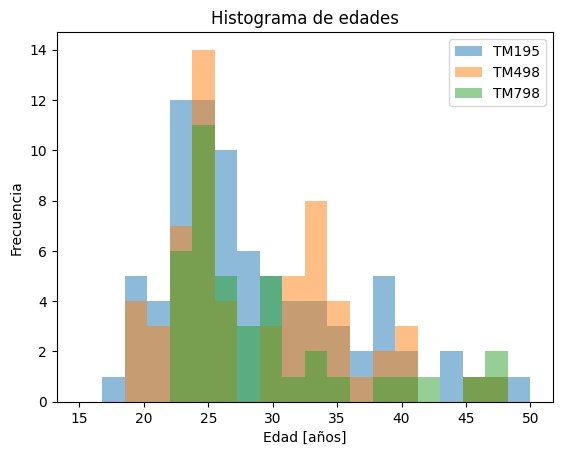

In [23]:
bins = np.linspace(15,50,21)

plt.hist(df_tm195['Age'], bins = bins, alpha = 0.5, label = 'TM195')
plt.hist(df_tm498['Age'], bins = bins, alpha = 0.5, label = 'TM498')
plt.hist(df_tm798['Age'], bins = bins, alpha = 0.5, label = 'TM798')

plt.xlabel('Edad [años]')
plt.ylabel('Frecuencia')
plt.title('Histograma de edades')

plt.legend(loc = 'upper right')
plt.show()

Se ve que hay una concentración de datos.

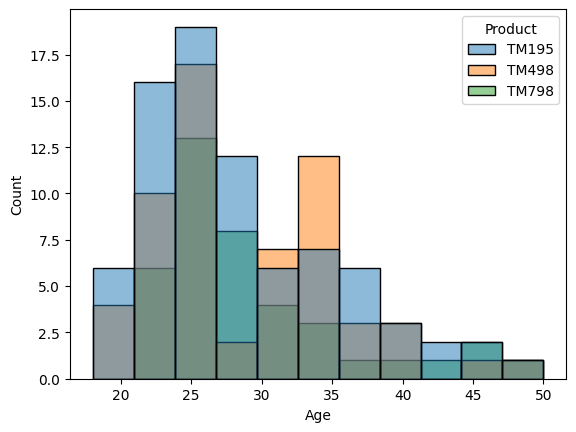

In [24]:
sns.histplot(x='Age',data = df_product, hue = 'Product')
plt.show()

### Género. Variable cualitativa

In [25]:
## Datos agrupados de género

df_g_tm195 = df_tm195['Gender'].value_counts().to_frame()
df_g_tm195


,count
Gender,
Male,40
Female,40


In [26]:
df_g_tm498 = df_tm498['Gender'].value_counts().to_frame()
df_g_tm498

,count
Gender,
Male,31
Female,29


In [27]:
df_g_tm798 = df_tm798['Gender'].value_counts().to_frame()
df_g_tm798

,count
Gender,
Male,33
Female,7


In [28]:
## agregamos tabla de frecuencias

Total_gender = np.sum(df_g_tm195['count']) # Total de observaciones

df_g_tm195['Porcentaje'] = df_g_tm195['count']/Total_gender

df_g_tm195

,count,Porcentaje
Gender,,
Male,40,0.5
Female,40,0.5


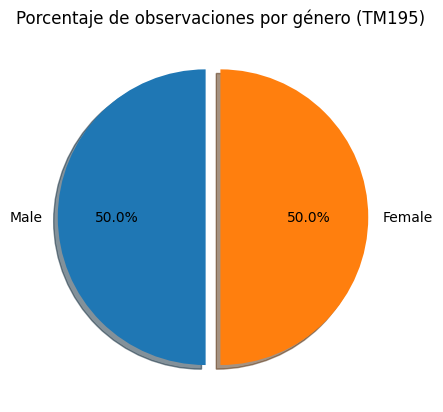

In [29]:
## Gráfico de pastel

labels = df_g_tm195.index # se toman los indices (en este caso el nombre del género) del dataset
sizes = df_g_tm195['count'] # valores de conteo

explode = (0.1,0) # para resaltar el pedazo más grande

plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Porcentaje de observaciones por género (TM195)')
plt.show()


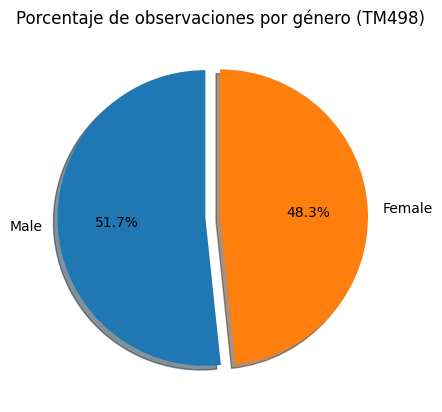

In [30]:
## Gráfico de pastel

labels = df_g_tm498.index # se toman los indices (en este caso el nombre del género) del dataset
sizes = df_g_tm498['count'] # valores de conteo

explode = (0.1,0) # para resaltar el pedazo más grande

plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Porcentaje de observaciones por género (TM498)')
plt.show()

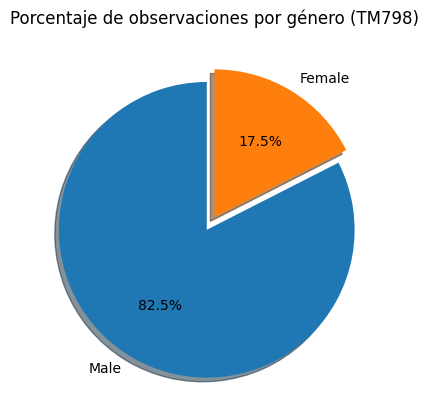

In [31]:
## Gráfico de pastel

labels = df_g_tm798.index # se toman los indices (en este caso el nombre del género) del dataset
sizes = df_g_tm798['count'] # valores de conteo

explode = (0.1,0) # para resaltar el pedazo más grande

plt.pie(sizes,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Porcentaje de observaciones por género (TM798)')
plt.show()

/tmp/ipykernel_241370/2682860668.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(y = 'count', x = df_g_tm798.index, data = df_g_tm798, palette='YlGnBu')


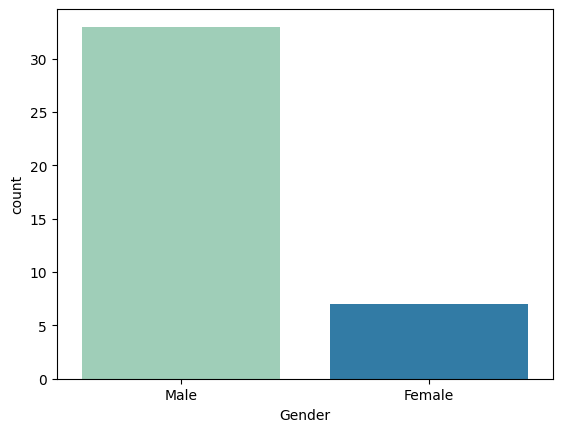

In [32]:
ax = sns.barplot(y = 'count', x = df_g_tm798.index, data = df_g_tm798, palette='YlGnBu')
plt.show()

### Estado Civil. Variable Cualitativa

In [33]:
## Agrupamos datos en un DataFrame

df_mar_tm195 = df_tm195['MaritalStatus'].value_counts().to_frame()
df_mar_tm498 = df_tm498['MaritalStatus'].value_counts().to_frame()
df_mar_tm798 = df_tm798['MaritalStatus'].value_counts().to_frame()

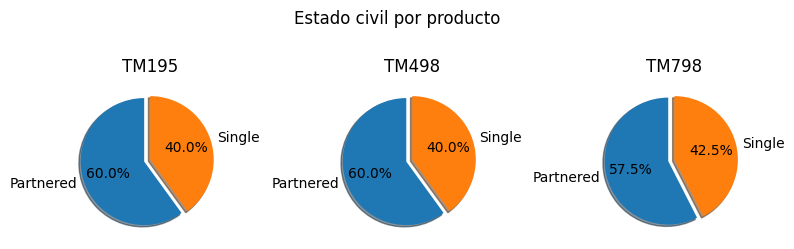

In [34]:
### Hacemos múltiples plots

labels = df_mar_tm195.index # los indices son los mismos para todos los productos, se usa para todos

# los tamaños no son los mismos
sizes_mar_tm195 = df_mar_tm195['count'] # valores de conteo
sizes_mar_tm498 = df_mar_tm498['count']
sizes_mar_tm798 = df_mar_tm798['count']

# resaltar un pedazo
explode = (0.1,0)

## figura de varios plots
fig=plt.figure(figsize=(8,6))

ax1 = fig.add_subplot(131)
ax1.pie(sizes_mar_tm195,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.title.set_text('TM195')

ax2 = fig.add_subplot(132)
ax2.pie(sizes_mar_tm498,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax2.title.set_text('TM498')

ax3 = fig.add_subplot(133)
ax3.pie(sizes_mar_tm798,explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax3.title.set_text('TM798')

fig.tight_layout(pad=1.0) # un poco más de separación entre plots

plt.suptitle("Estado civil por producto",y=0.75)
plt.show()



### Tabla pivote

Una **tabla pivote** es una herramienta para **resumir, reorganizar y analizar datos** agrupados según una o más variables categóricas. Permite calcular estadísticas agregadas (como suma, promedio o conteo) de una variable numérica en función de categorías.

Se utiliza normalmente para:

- Resumir grandes volúmenes de datos.
- Analizar el comportamiento de una variable numérica agrupada por una o más categorías.
- Calcular **medidas estadísticas** como suma, media, conteo, desviación estándar, etc.
- Reorganizar los datos en forma de matriz.

In [35]:
pd.pivot_table(df_product, index=['Product', 'Gender'],
                     columns=[ 'MaritalStatus'], aggfunc=len)

Age        Education          Fitness           Income  \
MaritalStatus  Partnered Single Partnered Single Partnered Single Partnered   
Product Gender                                                                
TM195   Female        27     13        27     13        27     13        27   
        Male          21     19        21     19        21     19        21   
TM498   Female        15     14        15     14        15     14        15   
        Male          21     10        21     10        21     10        21   
TM798   Female         4      3         4      3         4      3         4   
        Male          19     14        19     14        19     14        19   

                          Miles            Usage         
MaritalStatus  Single Partnered Single Partnered Single  
Product Gender                                           
TM195   Female     13        27     13        27     13  
        Male       19        21     19        21     19  
TM498   Female     14        15     14        15     14  
        Male       10        21     10        21     10  
TM798   Female      3         4      3         4      3  
        Male       14        19     14        19     14

# Medidas de tendencia central


### Media aritmética



Calculado con la ecuación:

$\mu = \frac{1}{N} \sum_{i=1}^N x_i$, donde N = 80 observaciones.




In [36]:
Media = np.mean(df_tm195['Age'])
print('El valor medio de edad es =', Media, 'años (TM195)')

El valor medio de edad es = 28.55 años (TM195)


In [37]:
Media = np.mean(df_tm498['Age'])
print('El valor medio de edad es =', Media, 'años (TM498)')

El valor medio de edad es = 28.9 años (TM498)


In [38]:
Media = np.mean(df_tm798['Age'])
print('El valor medio de edad es =', Media, 'años (TM798)')

El valor medio de edad es = 29.1 años (TM798)


### Mediana
Se calcula con los datos **ordenados**. El valor con índice intermedio es la mediana.

In [39]:
Mediana = np.median(df_tm195['Age'])
print('El valor de la mediana  es =', Mediana, 'años (TM195)')

El valor de la mediana  es = 26.0 años (TM195)


In [40]:
Mediana = np.median(df_tm498['Age'])
print('El valor de la mediana  es =', Mediana, 'años (TM498)')

El valor de la mediana  es = 26.0 años (TM498)


In [41]:
Mediana = np.median(df_tm798['Age'])
print('El valor de la mediana  es =', Mediana, 'años (TM798)')

El valor de la mediana  es = 27.0 años (TM798)


### Moda
Es el valor que se repite con mayor frecuencia.

In [42]:
## agrupando datos
df_age = df_tm195['Age'].value_counts().to_frame()
df_age.head()
### normalmente se muestran de mayor a menor

,count
Age,
23,8
25,7
26,7
28,6
24,5


In [43]:
import statistics ## paqueteria utilizada

### Unimodal

In [44]:
mode = statistics.mode(df_tm195.Age)
print('El valor de la moda es =', mode, 'años (TM195)')

El valor de la moda es = 23 años (TM195)


In [45]:
mode = statistics.mode(df_tm498.Age)
print('El valor de la moda es =', mode, 'años (TM498)')

El valor de la moda es = 25 años (TM498)


In [46]:
mode = statistics.mode(df_tm798.Age)
print('El valor de la moda es =', mode, 'años (TM798)')

El valor de la moda es = 25 años (TM798)


### Multimodal

In [47]:
mode = statistics.multimode(df_tm195.Age)
print('El valor de la moda es =', mode, 'años (TM195)')

El valor de la moda es = [23] años (TM195)


In [48]:
mode = statistics.multimode(df_tm498.Age)
print('El valor de la moda es =', mode, 'años (TM498)')

El valor de la moda es = [25] años (TM498)


In [49]:
mode = statistics.multimode(df_tm798.Age)
print('El valor de la moda es =', mode, 'años (TM798)')

El valor de la moda es = [25] años (TM798)


De lo anterior, vemos que el valor que más ser repite son 23 años de edad, con 8 observaciones. Esto también es posible observarlo en el histograma anterior, en la categoria de entre 21 y 25 años. Aquí ya podemos ver que los valores de de la media son los más altos, lo que indica una asimetría positiva.

## Medidas de dispersión

### Varianza y desviación estándar.

Definido como la media aritmética de las desviaciones al cuadrado. $\sigma^2 = Var(X) = \frac{\sum (x_i - \bar{x})^2}{n-1}$, $SD(X) = \sqrt{Var(X)}$. Esto es para una muestra.

In [50]:
##varianza y desviación estandar

var = np.var(df_tm195['Age'],ddof=1) ## varianza calculada con numpy python (para muestra)
sd = np.std(df_tm195['Age'],ddof=1) ## desviacion estándar calculada con numpy (para muestra)

print('El valor de la varianza  es =', round(var,2), 'años al cuadrado (TM195)')
print('El valor de la desviación estándar  es =', round(sd,2), 'años (TM195)')

El valor de la varianza  es = 52.15 años al cuadrado (TM195)
El valor de la desviación estándar  es = 7.22 años (TM195)


In [51]:
var = np.var(df_tm498['Age'],ddof=1) ## varianza calculada con numpy python (para muestra)
sd = np.std(df_tm498['Age'],ddof=1) ## desviacion estándar calculada con numpy (para muestra)

print('El valor de la varianza  es =', round(var,2), 'años al cuadrado (TM498)')
print('El valor de la desviación estándar  es =', round(sd,2), 'años (TM498)')

El valor de la varianza  es = 44.16 años al cuadrado (TM498)
El valor de la desviación estándar  es = 6.65 años (TM498)


In [52]:
var = np.var(df_tm798['Age'],ddof=1) ## varianza calculada con numpy python (para muestra)
sd = np.std(df_tm798['Age'],ddof=1) ## desviacion estándar calculada con numpy (para muestra)

print('El valor de la varianza  es =', round(var,2), 'años al cuadrado (TM798)')
print('El valor de la desviación estándar  es =', round(sd,2), 'años (TM798)')

El valor de la varianza  es = 48.61 años al cuadrado (TM798)
El valor de la desviación estándar  es = 6.97 años (TM798)


### Rango
Definido por la diferencia entre los valores extremos de mi set de datos Rango = max(x) - min(x)



In [53]:
## Rango
r_max = max(df_tm195['Age'])
r_min = min(df_tm195['Age'])

rango = r_max - r_min

print('El rango de la distribución es de =', rango, 'años')
print('Valor maximo =', r_max, 'años (TM195)')
print('Valor minimo =', r_min, 'años (TM195)')

El rango de la distribución es de = 32 años
Valor maximo = 50 años (TM195)
Valor minimo = 18 años (TM195)


In [54]:
## Rango
r_max = max(df_tm498['Age'])
r_min = min(df_tm498['Age'])

rango = r_max - r_min

print('El rango de la distribución es de =', rango, 'años')
print('Valor maximo =', r_max, 'años (TM498)')
print('Valor minimo =', r_min, 'años (TM498)')

El rango de la distribución es de = 29 años
Valor maximo = 48 años (TM498)
Valor minimo = 19 años (TM498)


In [55]:
## Rango
r_max = max(df_tm798['Age'])
r_min = min(df_tm798['Age'])

rango = r_max - r_min

print('El rango de la distribución es de =', rango, 'años')
print('Valor maximo =', r_max, 'años (TM798)')
print('Valor minimo =', r_min, 'años (TM798)')

El rango de la distribución es de = 26 años
Valor maximo = 48 años (TM798)
Valor minimo = 22 años (TM798)


# Resumen de la estadística

In [56]:
df_tm195.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,80.000000,80.000000,80.000000,80.00000,80.00000,80.000000
mean,28.550000,15.037500,3.087500,2.96250,46418.02500,82.787500
std,7.221452,1.216383,0.782624,0.66454,9075.78319,28.874102
min,18.000000,12.000000,2.000000,1.00000,29562.00000,38.000000
25%,23.000000,14.000000,3.000000,3.00000,38658.00000,66.000000
50%,26.000000,16.000000,3.000000,3.00000,46617.00000,85.000000
75%,33.000000,16.000000,4.000000,3.00000,53439.00000,94.000000
max,50.000000,18.000000,5.000000,5.00000,68220.00000,188.000000


In [57]:
df_tm498.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,60.000000,60.000000,60.000000,60.00000,60.000000,60.000000
mean,28.900000,15.116667,3.066667,2.90000,48973.650000,87.933333
std,6.645248,1.222552,0.799717,0.62977,8653.989388,33.263135
min,19.000000,12.000000,2.000000,1.00000,31836.000000,21.000000
25%,24.000000,14.000000,3.000000,3.00000,44911.500000,64.000000
50%,26.000000,16.000000,3.000000,3.00000,49459.500000,85.000000
75%,33.250000,16.000000,3.250000,3.00000,53439.000000,106.000000
max,48.000000,18.000000,5.000000,4.00000,67083.000000,212.000000


In [58]:
df_tm798.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,40.000000,40.000000,40.000000,40.000000,40.00000,40.000000
mean,29.100000,17.325000,4.775000,4.625000,75441.57500,166.900000
std,6.971738,1.639066,0.946993,0.667467,18505.83672,60.066544
min,22.000000,14.000000,3.000000,3.000000,48556.00000,80.000000
25%,24.750000,16.000000,4.000000,4.000000,58204.75000,120.000000
50%,27.000000,18.000000,5.000000,5.000000,76568.50000,160.000000
75%,30.250000,18.000000,5.000000,5.000000,90886.00000,200.000000
max,48.000000,21.000000,7.000000,5.000000,104581.00000,360.000000


### Coeficiente de variación
Descrito por la ecuación $CV = \frac{\sigma}{\mu} \times 100$ (porcentaje) y que muestra la relación entre el tamaño de la media y la desviación estándar (es un valor adimensional).

In [59]:
## Coeficiente de variacion
sd = np.std(df_tm195['Age'],ddof=1) # recordar que es una muestra
Media = np.mean(df_tm195['Age'])

CV = (sd/Media)*100.
print('El coeficiente de variacion de la distribución es de =', CV,'% (TM195)')

El coeficiente de variacion de la distribución es de = 25.29405207869887 % (TM195)


In [60]:
## Coeficiente de variacion
sd = np.std(df_tm498['Age'],ddof=1) # recordar que es una muestra
Media = np.mean(df_tm498['Age'])

CV = (sd/Media)*100.
print('El coeficiente de variacion de la distribución es de =', CV,'% (TM498)')

El coeficiente de variacion de la distribución es de = 22.99393799025597 % (TM498)


In [61]:
## Coeficiente de variacion
sd = np.std(df_tm798['Age'],ddof=1) # recordar que es una muestra
Media = np.mean(df_tm798['Age'])

CV = (sd/Media)*100.
print('El coeficiente de variacion de la distribución es de =', CV,'% (TM798)')

El coeficiente de variacion de la distribución es de = 23.957861918067184 % (TM798)


### Cuartiles
Son los puntos x que dividen mi distribución en cuatro partes con la misma cantidad de datos (ordenados), el rango intercuartil está dado por IQR = Q3 - Q1. Se consideran valores atípicos a aquellos que no se encuentren en el rango (Q1 - IQR, Q3 + IQR).

In [62]:
# cuartiles Q1, Q2, Q3

Q1 = np.percentile(df_tm195['Age'],25, method='linear') # primer cuartil
Q2 = np.percentile(df_tm195['Age'],50, method='linear') # segundo cuartil
Q3 = np.percentile(df_tm195['Age'],75, method='linear') # tercer cuartil


print('Los cuartiles se encuentran en los valores','Q1 = ', Q1,'Q2 = ', Q2,'Q3 = ', Q3)

Los cuartiles se encuentran en los valores Q1 =  23.0 Q2 =  26.0 Q3 =  33.0


### Valores atípicos (Ouliers)

In [63]:
## Valores atípicos

#Valores atípicos 
Q1 = np.percentile(df_tm195['Age'],25)
Q3 = np.percentile(df_tm195['Age'],75)

IQR = Q3-Q1


print('El rango intercuartil es = ',IQR)
print('El intervalo para considerar valores atípicos es (',Q1 - IQR*1.5,',', Q3 + IQR*1.5,')')

Out = []

for x in df_tm195['Age']:
    if (x < (Q1 - IQR*1.5)) or (x > (Q3 + IQR*1.5)):
        Out.append(x)

print('Los valores atípicos de calorías que no caen en el intervalo son los siguientes:')        
Out

El rango intercuartil es =  10.0
El intervalo para considerar valores atípicos es ( 8.0 , 48.0 )
Los valores atípicos de calorías que no caen en el intervalo son los siguientes:


[50]

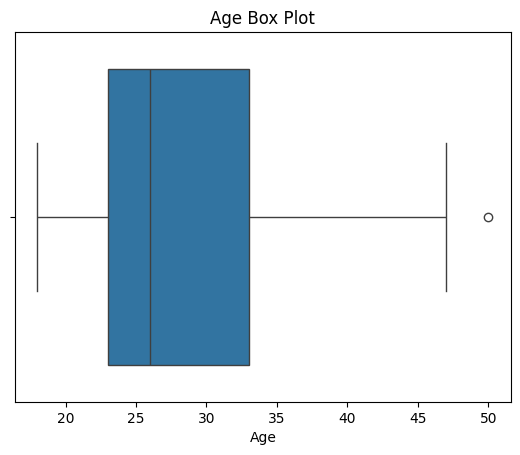

In [64]:
import seaborn as sns

sns.boxplot(x = df_tm195['Age'])
plt.title('Age Box Plot')
plt.show()

### Coeficiente de Asimetría

**Asimetría de Fisher** $CA_F = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^3}{n s^3}$. Lo define esta ecuación y nos muestra la simetría que tiene nuestra distribución.

In [65]:
# tercer momento : Asimetría de Fisher
Asimetria = stats.skew(df_tm195['Age'])
Asimetria

np.float64(0.9603783960948331)

Si el coeficiente es > 0 significa que la distribución está desplazada hacia la izquierda, de modo que tenemos una asimetría positiva.

### Curtosis

Definido por la ecuación $c = \frac{\sum_{i=1}^{n} (x_i - \bar{x})^4}{n s^4} - 3$. Nos muestra si los datos está mayormente distribuidos en la parte central o en los extremos de la distribución.

In [66]:
# Curtosis, cuarto momento
curtosis = stats.kurtosis(df_tm195['Age'])
curtosis

np.float64(0.3076007796317275)

Tenemos que la curtosis es > 0, por lo que se trata de una distribución leptocúrtica, lo que quiere decir que muchos de sus valores están distribuidos cerca de la media de la distribución. Aún así, el valor 0.3 nos dice que no es mucho.

# Correlación entre variables

In [67]:
## Numero de ventas vs inversión en TV, radio y periódico.
filename = "advertising_2.csv"
fullpath = os.path.join(mainpath,filename)

df_advertising = pd.read_csv(fullpath)
df_advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [68]:
df_advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [69]:
df_advertising.isna().any() ## para checar que no haya valores nulos

TV           False
Radio        False
Newspaper    False
Sales        False
dtype: bool

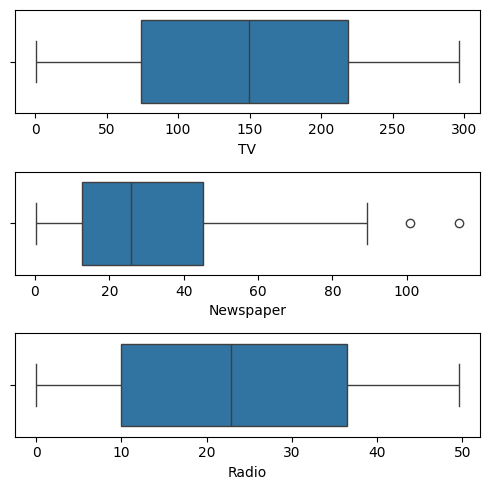

In [70]:
# Valores atípicos
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=df_advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(x=df_advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=df_advertising['Radio'], ax = axs[2])
plt.tight_layout()

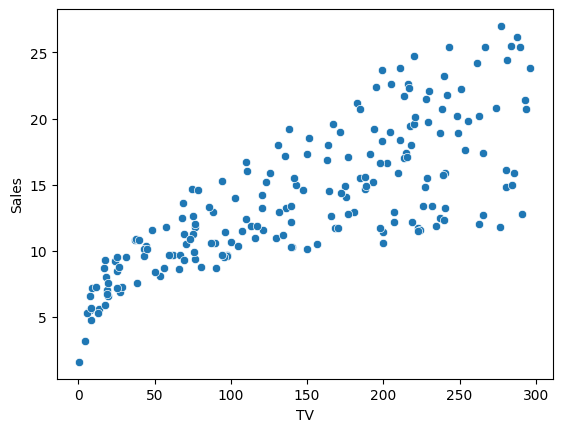

In [71]:
sns.scatterplot(x = 'TV', y = 'Sales', data = df_advertising)
plt.show()

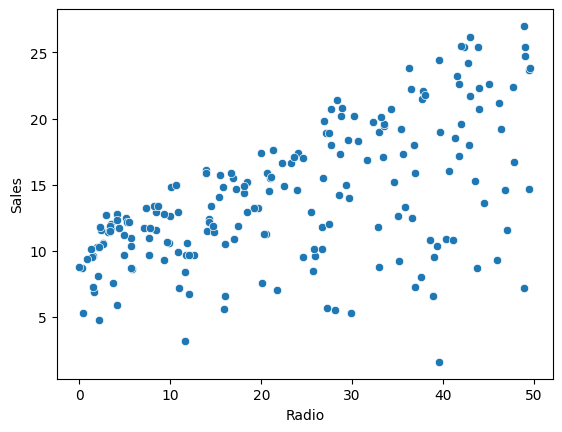

In [72]:
sns.scatterplot(x = 'Radio', y = 'Sales', data = df_advertising)
plt.show()

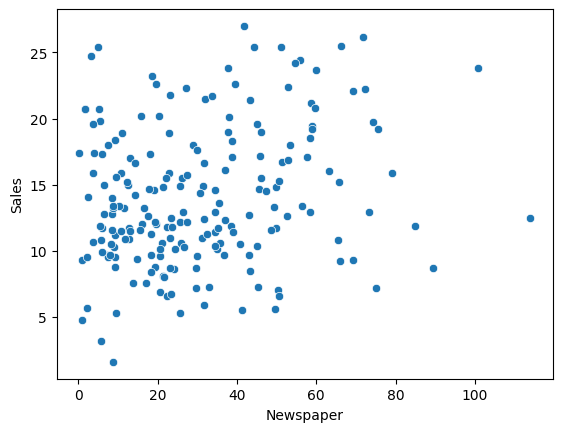

In [73]:
sns.scatterplot(x = 'Newspaper', y = 'Sales', data = df_advertising)
plt.show()

### Matriz de correlación

In [74]:
df_advertising.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


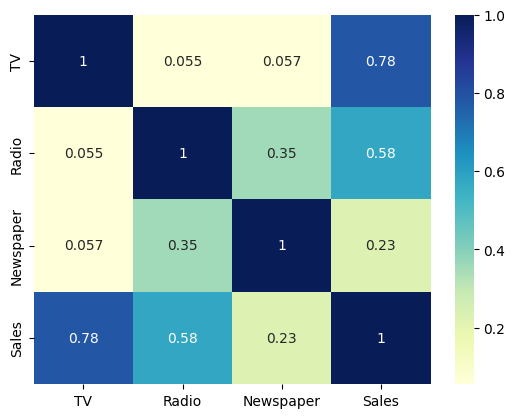

In [75]:
sns.heatmap(df_advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

#### Prueba de hipótesis, nivel de significancia de la correlación

Es una prueba de hipótesis basada en la distribución t, donde las hipótesis nula y alternativa son las siguientes:
* $H_0 : \rho = 0$
* $H_1 : \rho \ne 0$

El estadístico de prueba es:
$t = \frac{r\sqrt{n-2}}{\sqrt{1-r^2}}$

In [76]:
# Factor de correlacion y p valor entre dos variables

stats.pearsonr(df_advertising['Sales'],df_advertising['TV'])

# El primer factor es el factor de correlación de Pearson, y el segundo es el p-valor del estadístico de prueba t.

PearsonRResult(statistic=np.float64(0.7822244248616066), pvalue=np.float64(1.467389700194602e-42))

#### Regresión lineal
La ecuación de una recta es:

* $y = \beta_0 + \beta_1 x$

El criterio de mínimos cuadrados nos dice que los factores de la regresión están dados por $\beta_0 = \bar{y} - \beta_1 \bar{x}$, y $\beta_1 = \frac{cov(x,y)}{\sigma^2_x}$.

El modelo lineal predictivo sería Sales (y) = 7.03 + 0.04*TV(x)

In [77]:
# Paquete utilizado para hacer un modelo lineal
import statsmodels.formula.api as smf

# Con esta paqueteria podemos crear un modelo lineal
lm = smf.ols(formula = "Sales~TV", data = df_advertising).fit() #formula de la regresion Ventas en funcion de TV
#fit ajusta el modelo de acuerdo a estas condiciones(la recta que mejor se ajusta)

lm.summary() #resumen del modelo

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 04 Jun 2025   Prob (F-statistic):           1.47e-42
Time:                        00:15:18   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Otros coeficientes de correlacion

In [78]:
## defino manualmente una función que no sea lineal
x = np.arange(1.1,10,0.1)
y = 4. * x**4.0
#y = np.exp(x)
# le agrego un poco de ruido con una distribucion gaussiana
for i in range(0,len(y)):
    y[i] = y[i] + np.random.normal(0,50,1)[0]

$y = \beta_0 x^{\beta_1}$

$\log(y) = log(\beta_0) + \beta_1 \log(x)$

/tmp/ipykernel_241370/742997870.py:3: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(x),np.log(y))


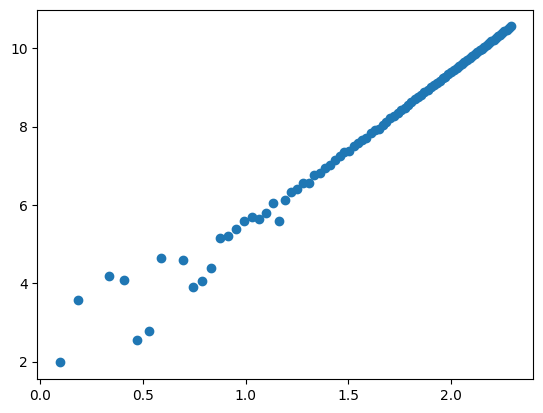

In [79]:
#plt.scatter(np.log(x),np.log(y))

plt.scatter(np.log(x),np.log(y))

In [80]:
## Creo un DataFrame, o sea un objetos de Pandas
data_corr = pd.DataFrame(
{
    'x' : x,
    'y' : y
}
)
data_corr

,x,y
0,1.1,7.223989
1,1.2,36.005008
2,1.3,-20.274176
3,1.4,64.918162
4,1.5,60.065468
...,...,...
84,9.5,32563.417031
85,9.6,33983.108313
86,9.7,35462.543335
87,9.8,37005.282134


In [81]:
# Un objeto de pandas incluye diferentes coeficientes de correlacion

# metodos del coeficiente de correlacion
#‘pearson’, ‘kendall’, ‘spearman’

print('Coeficientes de correlacion')
print(data_corr.corr(method='pearson'))

Coeficientes de correlacion
          x         y
x  1.000000  0.891365
y  0.891365  1.000000


In [82]:
print('Coeficientes de correlacion')
print(data_corr.corr(method='kendall'))

Coeficientes de correlacion
          x         y
x  1.000000  0.983146
y  0.983146  1.000000


In [83]:
print('Coeficientes de correlacion')
print(data_corr.corr(method='spearman'))

Coeficientes de correlacion
          x         y
x  1.000000  0.998042
y  0.998042  1.000000


# Pruebas de normalidad

In [84]:
filename = "CompanyABCProfit.csv"
fullpath = os.path.join(mainpath,filename)

df_profit = pd.read_csv(fullpath)
df_profit.columns = ['Year','Profit']
df_profit.head(100)  # Mostrar las primeras 10 líneas

,Year,Profit
0,1821,1645
1,1822,658
2,1823,1926
3,1824,865
4,1825,764
...,...,...
95,1916,886
96,1917,1037
97,1918,819
98,1919,1247


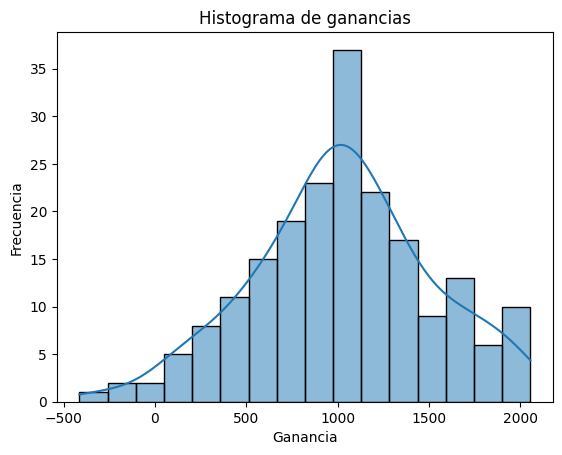

In [85]:
sns.histplot(df_profit['Profit'],kde=True, bins=16)
plt.title('Histograma de ganancias')
plt.ylabel('Frecuencia')
plt.xlabel('Ganancia')
plt.show()

#### Q-Q (Quantile-Quantile) Plot

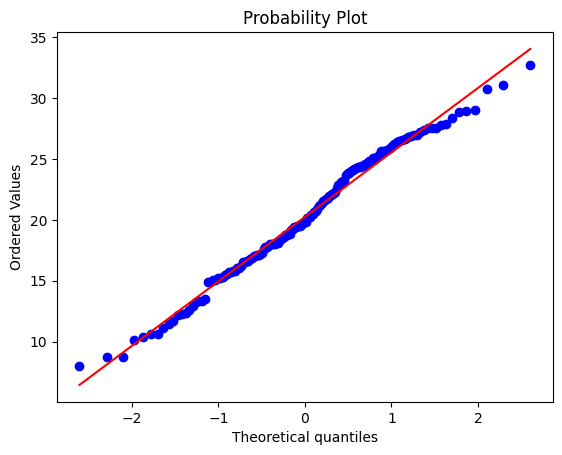

In [86]:
## Q Q plot # ficticio

mes = np.random.normal(loc = 20, scale = 5, size = 150)
stats.probplot(mes, dist = 'norm',plot=plt)
plt.show()

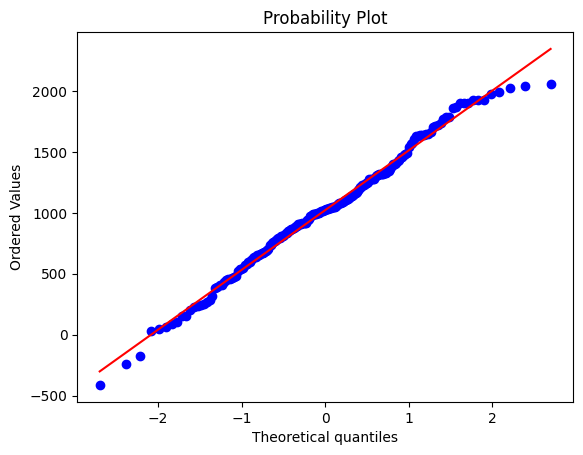

In [87]:
## Q Q plot
stats.probplot(df_profit['Profit'], dist = 'norm',plot=plt)
plt.show()

#### Box plot

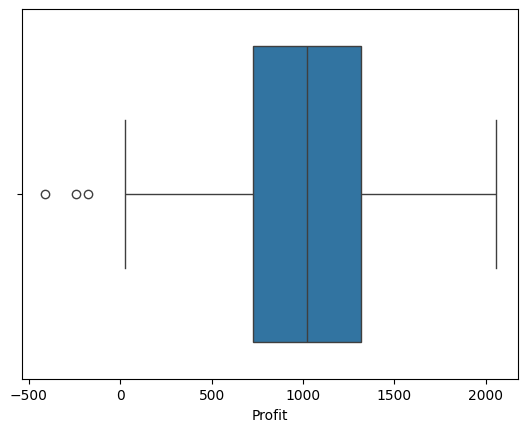

In [88]:
sns.boxplot(x=df_profit['Profit'])
plt.show()

#### Skewness (Asimetría)

In [89]:
stats.skew(df_profit['Profit'])

np.float64(-0.12793336180347498)

#### Shapiro-Wilk (Prueba de hipótesis)
[Link](https://bookdown.org/dietrichson/metodos-cuantitativos/test-de-normalidad.html)

In [90]:
stat, p = stats.shapiro(df_profit['Profit'])
print('stat=%.3f, p=%.3f\n' % (stat,p))

if p > 0.05:
    print('Probablemente es gaussiano')
else:
    print('Probablemente no es gaussiano')

stat=0.991, p=0.217

Probablemente es gaussiano


Se utilizó la ecuación
$\rm{var}(x) = \frac{\sum x^2}{n-1}$

#### Kolmogorov-Smirnov
[Link](https://www.ime.unicamp.br/~dias/Lecture%2013.pdf)

In [91]:
## Estandarizamos una distribución normal
df_profit['Standard Profit'] = stats.zscore(df_profit['Profit'])
df_profit.head(3)

,Year,Profit,Standard Profit
0,1821,1645,1.279980
1,1822,658,-0.747821
2,1823,1926,1.857297


In [92]:
stat, p = stats.kstest(df_profit['Standard Profit'],'norm')
print('stat=%.3f, p=%.3f\n' % (stat,p))

if p > 0.05:
    print('Probablemente es gaussiano')
else:
    print('Probablemente no es gaussiano')

stat=0.040, p=0.893

Probablemente es gaussiano


# Prueba de independencia

In [93]:
## Creamos un data set como tabla de contingencia

data_chi = pd.DataFrame(
    [
        [12,5],
        [4,9]
    ],
    index=["Ansiedad_A","Ansiedad_B"],
    columns=["Solo","Acompanado"])
data_chi

,Solo,Acompanado
Ansiedad_A,12,5
Ansiedad_B,4,9


In [94]:
### Test de independencia
stats.chi2_contingency(data_chi,correction=False)
## El cuarto (index=3) argumento tiene datos de valores esperados bajo la tabla de contingencia de referencia

Chi2ContingencyResult(statistic=np.float64(4.692954104718812), pvalue=np.float64(0.03028653513285802), dof=1, expected_freq=array([[9.06666667, 7.93333333],
       [6.93333333, 6.06666667]]))

In [95]:
expected = stats.chi2_contingency(data_chi,correction=False)[3] 
## el indice = 3 incluye el arreglo de valores esperado

pd.DataFrame(
    data=expected[:,:], 
    index=["Ansiedad_A","Ansiedad_B"],
    columns=["Solo","Acompanado"]
).round(2)


,Solo,Acompanado
Ansiedad_A,9.07,7.93
Ansiedad_B,6.93,6.07


In [96]:
### Esta misma tarea ya tiene el valor de la estadística chi2 en el primer argumento (index = 0)
chisquare = stats.chi2_contingency(data_chi,correction=False)[0]
print('Estadistica de prueba chisquare = ',chisquare)

Estadistica de prueba chisquare =  4.692954104718812


In [97]:
### El segundo argumento es el p-valor asosciado (index = 1)
p_value = stats.chi2_contingency(data_chi,correction=False)[1]
print('p-value = ',p_value)

p-value =  0.03028653513285802


In [98]:
### El tercer argumento son los grados de libertad calculados (index = 2)
d_f = stats.chi2_contingency(data_chi,correction=False)[2]
print('Grados de libertad (dof) = ',d_f)

Grados de libertad (dof) =  1


In [99]:
if p_value < 0.05:
    print('Es probable que las variables tengan algún tipo de relación')
else:
    print('Es probable que las variables no tengan relación')

Es probable que las variables tengan algún tipo de relación


### Coeficiente de contingencia

In [100]:
cont_coeff = stats.contingency.association(data_chi, method='pearson')
cont_coeff

0.36779219835912796

In [101]:
# Chi-squared test statistic
chisquare = stats.chi2_contingency(data_chi, correction=False)[0]
n = data_chi.to_numpy().sum()
minDim = min(data_chi.shape)-1

#Se calcula coeficiente de Cramer V 
V = np.sqrt((chisquare/n) / minDim)

print('Coeficiente de Kramer V = ',V)

Coeficiente de Kramer V =  0.39551460591314075


### Coeficiente de Cramér (Cramér's V)

El **coeficiente V de Cramér** (**Cramér's V**), es una medida de **asociación entre dos variables categóricas** basada en la prueba de chi-cuadrado. Permite cuantificar qué tan fuertemente relacionadas están dos variables **nominales** en una tabla de contingencia.

#### Interpretación

| Valor de \( V \) | Interpretación general                |
|------------------|----------------------------------------|
| 0.00 – 0.10      | Asociación débil o nula                |
| 0.10 – 0.30      | Asociación pequeña                     |
| 0.30 – 0.50      | Asociación moderada                    |
| > 0.50           | Asociación fuerte                      |